# Simple component separation

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import healpy as hp
import pysm3

from fgbuster import (CMB, Dust, Synchrotron, 
                      basic_comp_sep, 
                      get_observation, get_instrument)
from fgbuster.visualization import corner_norm

## Simulate your frequency maps
You have some frequecy maps to clean, they can be either data or simulations. For example, you can use `pysm` to simulate microwave skys with different complexities. ForeGroundBuster adds a couple of functions that make the process even easier.

In [2]:
nside = 32
instrument = get_instrument('LiteBIRD')
freq_maps = get_observation(instrument, 'c1d0s0', nside=nside)

## Define what you fit for
Create your sky model as a list of components

In [3]:
components = [CMB(), Dust(150.), Synchrotron(20.)]

## Component separation
The tools inside ForeGroundBuster allow for very flexible and diverse component separation approaches. However, we also provide a set of predefined function that perform component separation out of the box. They suit most common use cases.

In [4]:
result = basic_comp_sep(components, instrument, freq_maps)

## Explore the results
You have just solved for both the spectral parameters of your components and their amplitudes.

Get the spectral parameters name and values with

In [5]:
print(result.params)
print(result.x)

['Dust.beta_d', 'Dust.temp', 'Synchrotron.beta_pl']
[ 1.54 20.   -3.  ]


You can also have a look at their semi-analytic covariance, but remember that it is accurate only the high signal-to-noise regime

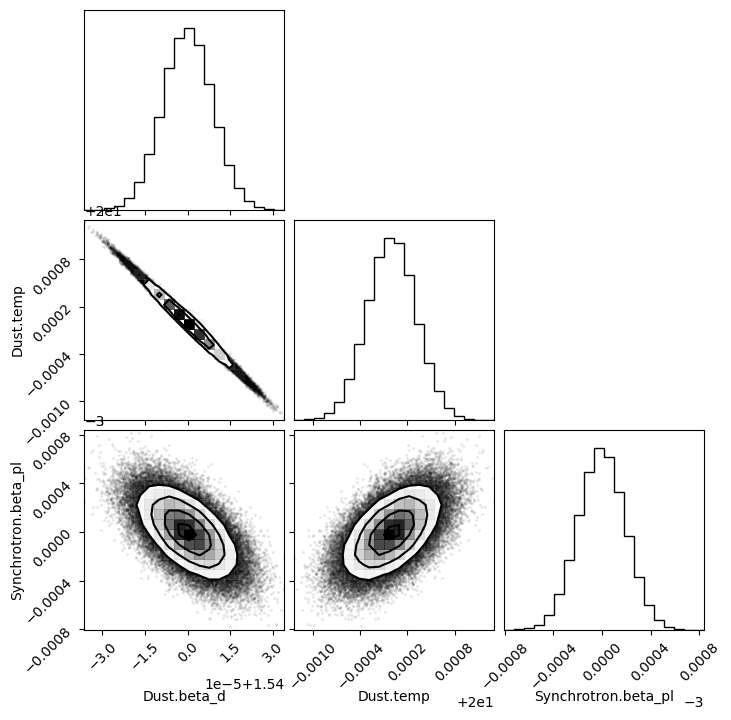

In [6]:
corner_norm(result.x, result.Sigma, labels=result.params)

The amplitudes of the components are stacked in the ``s`` attribute and they are in the same format of the input frequency maps: Q and U healpix maps, in this case.

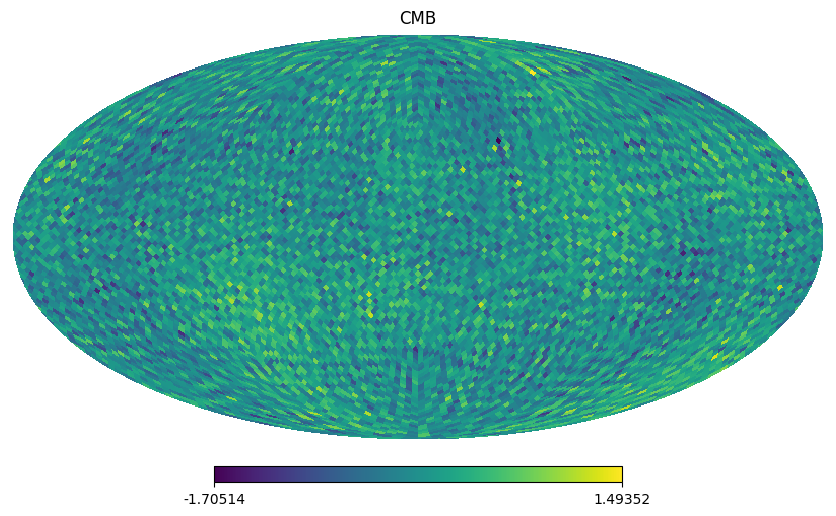

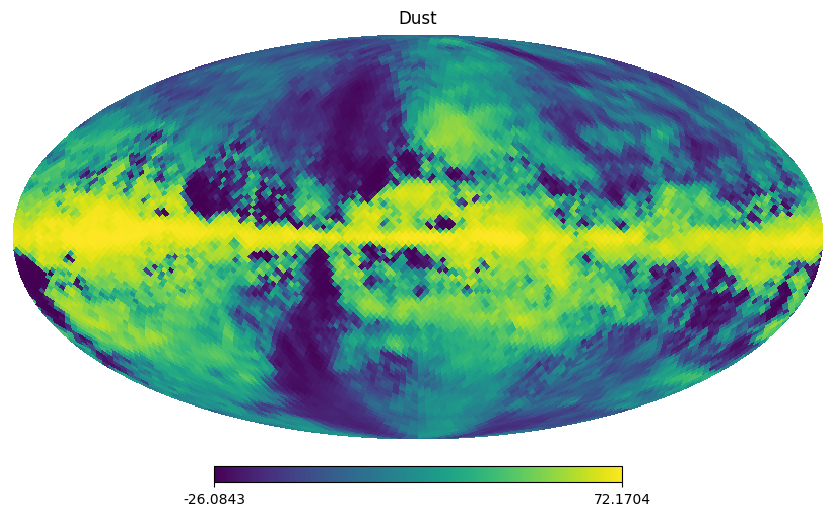

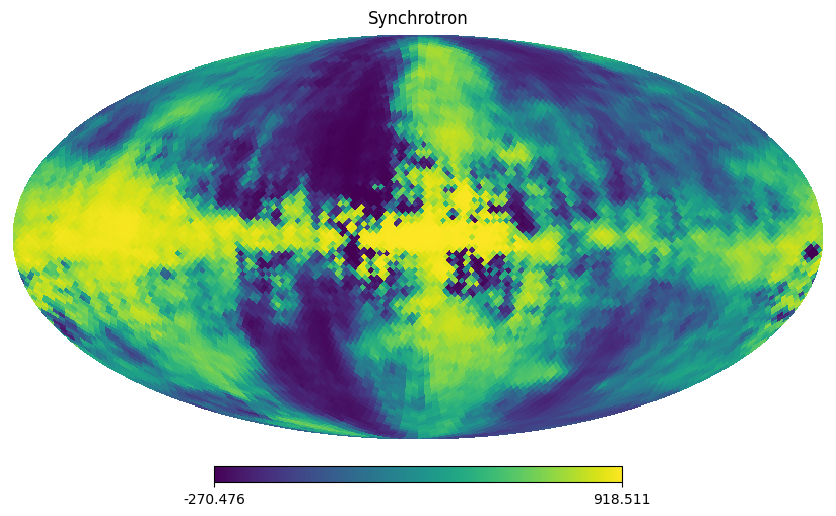

In [7]:
hp.mollview(result.s[0,1], title='CMB')
hp.mollview(result.s[1,1], title='Dust', norm='hist')
hp.mollview(result.s[2,1], title='Synchrotron', norm='hist')